In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
from ydata_profiling import ProfileReport

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_pickle("all_tweets_v10.pkl")
df.head(3)

author_id context_annotations      conversation_id  \
0  1449804331142811655                  []  1617597872803041280   
1  1449804331142811655                  []  1617597646339702823   
2  1449804331142811655                  []  1617597571903676417   

           created_at edit_history_tweet_ids                   id  \
0 2023-01-23 18:59:21  [1617597872803041280]  1617597872803041280   
1 2023-01-23 18:58:27  [1617597646339702823]  1617597646339702823   
2 2023-01-23 18:58:09  [1617597571903676417]  1617597571903676417   

   in_reply_to_user_id lang  possibly_sensitive  \
0                  NaN   tr               False   
1                  NaN   fr               False   
2                  NaN   en               False   

                                   referenced_tweets reply_settings  \
0                                                NaN       everyone   
1                                                NaN       everyone   
2  [<ReferencedTweet id=1617584897383714816 type=...       everyone   

                                                text      author withheld  \
0  Kararlarındaki temel dayanak, hukukun evrensel...  Goksun_KHK      NaN   
1  #OhalKomisyonuHukuksuzdur https://t.co/3aUr5MZWPU  Goksun_KHK      NaN   
2  @Yozgat_KHK: #OhalKomisyonuHukuksuzdur\nÇünkü ...  Goksun_KHK      NaN   

   geo  quote_count  retweet_count  like_count  reply_count  impression_count  \
0  NaN            0              2           1            0                82   
1  NaN            0              1           0            0                52   
2  NaN            0             48           0            0                 0   

                media_keys poll_ids  \
0                      NaN      NaN   
1  [3_1617597636604723228]      NaN   
2                      NaN      NaN   

                                            hashtags  \
0  [{'start': 95, 'end': 120, 'tag': 'OhalKomisyo...   
1  [{'start': 0, 'end': 25, 'tag': 'OhalKomisyonu...   
2  [{'start': 16, 'end': 41, 'tag': 'OhalKomisyon...   

                                                urls  \
0                                                NaN   
1  [{'start': 26, 'end': 49, 'url': 'https://t.co...   
2                                                NaN   

                                            mentions cashtags annotations  \
0                                                NaN      NaN         NaN   
1                                                NaN      NaN         NaN   
2  [{'start': 3, 'end': 14, 'username': 'Yozgat_K...      NaN         NaN   

   is_retweet gender_of_author profession_of_author        hashtags_flattened  \
0           0              ORG        NOT AVAILABLE  OhalKomisyonuHukuksuzdur   
1           0              ORG        NOT AVAILABLE  OhalKomisyonuHukuksuzdur   
2           1              ORG        NOT AVAILABLE  OhalKomisyonuHukuksuzdur   

               trend_topics  n_trend_topics  text_length  has_media  \
0  OhalKomisyonuHukuksuzdur               1          120          0   
1  OhalKomisyonuHukuksuzdur               1           49          1   
2  OhalKomisyonuHukuksuzdur               1           99          0   

   has_hashtags  has_mentions  is_reply tweet_type  ratio_like  ratio_retweet  \
0             1             0         0   standard    0.012195       0.024390   
1             1             0         0   standard    0.000000       0.019231   
2             1             1         0  retweeted         NaN            inf   

  majority_lang   english  universal  eng_astroturf  eng_fake_follower  \
0            tr  0.874858   0.847463           0.13               0.51   
1            tr  0.874858   0.847463           0.13               0.51   
2            tr  0.874858   0.847463           0.13               0.51   

   eng_financial  eng_other  eng_overall  eng_self_declared  eng_spammer  \
0           0.22       0.91         0.91               0.08         0.25   
1           0.22       0.91         0.91   

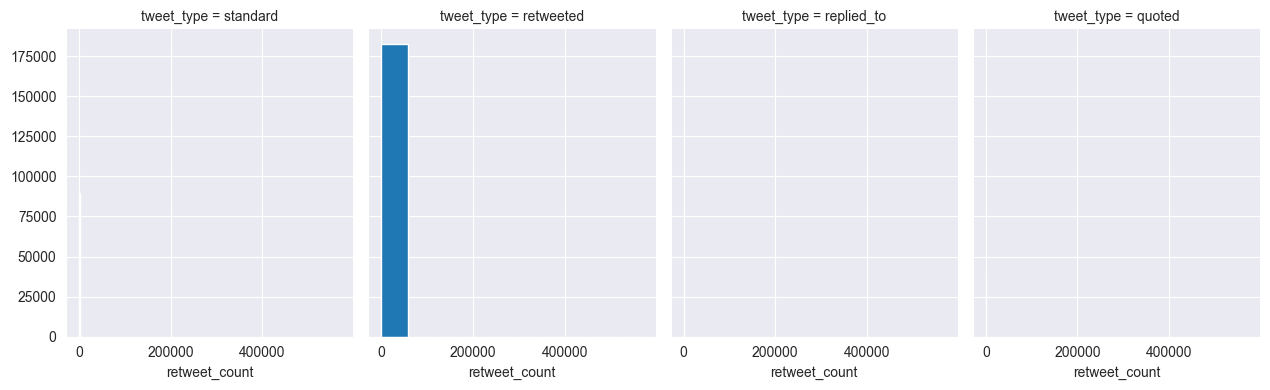

In [3]:
# set the Seaborn style to "darkgrid"
sns.set_style("darkgrid")

# create a FacetGrid to plot histograms for each tweet_type
g = sns.FacetGrid(df, col="tweet_type", height=4, aspect=0.8)

# plot a histogram of like_count for each tweet_type
g.map(plt.hist, "retweet_count", bins=10)

# show the plots
plt.show()

In [4]:
df.groupby(["tweet_type"])["like_count", "retweet_count"].describe()

/var/folders/z5/hjyvlbm54v1cpt9s019vbv9w0000gn/T/ipykernel_1474/133297248.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["tweet_type"])["like_count", "retweet_count"].describe()


like_count                                                          \
                count        mean          std  min  25%   50%   75%      max   
tweet_type                                                                      
quoted        36571.0   47.314949   294.929634  0.0  1.0   4.0  16.0  28509.0   
replied_to    48715.0   23.100893   272.202859  0.0  1.0   2.0   5.0  25753.0   
retweeted    182648.0    0.000000     0.000000  0.0  0.0   0.0   0.0      0.0   
standard      91102.0  220.721642  1330.305159  0.0  5.0  16.0  61.0  73017.0   

           retweet_count                                                 \
                   count        mean          std  min  25%   50%   75%   
tweet_type                                                                
quoted           36571.0   10.276886    53.496979  0.0  0.0   1.0   5.0   
replied_to       48715.0    4.330042    33.192648  0.0  0.0   0.0   1.0   
retweeted       182648.0  248.566456  2434.066974  0.0  7.0  23.0  96.0   
standard         91102.0   50.116166   203.240353  0.0  2.0   6.0  19.0   

                      
                 max  
tweet_type            
quoted        3084.0  
replied_to    2321.0  
retweeted   570083.0  
standard      7413.0

# Investigate Retweets

In [9]:
df[df.tweet_type == "retweeted"].head(5)

author_id context_annotations      conversation_id  \
2   1449804331142811655                  []  1617597571903676417   
4   1449804331142811655                  []  1617597477963829248   
7   1449804331142811655                  []  1617597218038349833   
9   1449804331142811655                  []  1617597107396804608   
11  1449804331142811655                  []  1617596957253603329   

            created_at edit_history_tweet_ids                   id  \
2  2023-01-23 18:58:09  [1617597571903676417]  1617597571903676417   
4  2023-01-23 18:57:46  [1617597477963829248]  1617597477963829248   
7  2023-01-23 18:56:44  [1617597218038349833]  1617597218038349833   
9  2023-01-23 18:56:18  [1617597107396804608]  1617597107396804608   
11 2023-01-23 18:55:42  [1617596957253603329]  1617596957253603329   

    in_reply_to_user_id lang  possibly_sensitive  \
2                   NaN   en               False   
4                   NaN   tr               False   
7                   NaN   tr               False   
9                   NaN   tr               False   
11                  NaN   tr               False   

                                    referenced_tweets reply_settings  \
2   [<ReferencedTweet id=1617584897383714816 type=...       everyone   
4   [<ReferencedTweet id=1617597368417013761 type=...       everyone   
7   [<ReferencedTweet id=1617592668011233290 type=...       everyone   
9   [<ReferencedTweet id=1617588066889121792 type=...       everyone   
11  [<ReferencedTweet id=1617595488555126784 type=...       everyone   

                                                 text      author withheld  \
2   @Yozgat_KHK: #OhalKomisyonuHukuksuzdur\nÇünkü ...  Goksun_KHK      NaN   
4   @Malatya_KHK: Öldükten sonra insanlari işe iad...  Goksun_KHK      NaN   
7   @Dbakir_KHK_21: Talimat ile kuruldu\ntalimat i...  Goksun_KHK      NaN   
9   @Trabzon_KHK_61: Kendini anayasanın üstünde gö...  Goksun_KHK      NaN   
11  @antalya_khk: Mağdur ettiği vatandaşının hızlı...  Goksun_KHK      NaN   

    geo  quote_count  retweet_count  like_count  reply_count  \
2   NaN            0             48           0            0   
4   NaN            0              4           0            0   
7   NaN            0             25           0            0   
9   NaN            0             15           0            0   
11  NaN            0             21           0            0   

    impression_count media_keys poll_ids  \
2                  0        NaN      NaN   
4                  0        NaN      NaN   
7                  0        NaN      NaN   
9                  0        NaN      NaN   
11                 0        NaN      NaN   

                                             hashtags urls  \
2   [{'start': 16, 'end': 41, 'tag': 'OhalKomisyon...  NaN   
4   [{'start': 57, 'end': 82, 'tag': 'OhalKomisyon...  NaN   
7   [{'start': 93, 'end': 118, 'tag': 'OhalKomisyo...  NaN   
9                                                 NaN  NaN   
11                                                NaN  NaN   

                                             mentions cashtags annotations  \
2   [{'start': 3, 'end': 14, 'username': 'Yozgat_K...      NaN         NaN   
4   [{'start': 3, 'end': 15, 'username': 'Malatya_...      NaN         NaN   
7   [{'start': 3, 'end': 17, 'username': 'Dbakir_K...      NaN         NaN   
9   [{'start': 3, 'end': 18, 'username': 'Trabzon_...      NaN         NaN   
11  [{'start': 3, 'end': 15, 'username': 'antalya_...      NaN         NaN   

    is_retweet gender_of_author profession_of_author  \
2            1              ORG        NOT AVAILABLE   
4            1              ORG        NOT AVAILABLE   
7            1              ORG        NOT AVAILABLE   
9            1              ORG        NOT AVAILABLE   
11           1              ORG        NOT AVAILABLE   

          hashtags_flattened              trend_topics  n_trend_topics  \
2   OhalKomisyonuHukuksuzdur  OhalKomisyonuHukuksuzdur            

In [10]:
retweets = df[df.tweet_type == "retweeted"]
retweets["duplicated_retweets"] = df.text.duplicated()

/var/folders/z5/hjyvlbm54v1cpt9s019vbv9w0000gn/T/ipykernel_43579/1798127718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retweets["duplicated_retweets"] = df.text.duplicated()


In [11]:
duplicated_retweets = retweets[retweets.duplicated_retweets]

In [12]:
duplicated_retweets.sort_values("text").iloc[2200].text

'@Ankara_KHK: Dostoyevski şöyle diyor;\nHiç İnsan Öldürmediği halde\nBir katilden daha cani\nİnsanlar gördüm\nUmudumuzu Öldürenleri\nGördüm..💙…'

In [13]:
df[
    df.text.str.contains(
        "Dostoyevski şöyle diyor;\nHiç İnsan Öldürmediği halde\nBir katilden daha cani"
    )
]

author_id  \
155911  1480235753561075715   
289530  1485178621006422023   

                                      context_annotations  \
155911  [{'domain': {'id': '131', 'name': 'Unified Twi...   
289530  [{'domain': {'id': '131', 'name': 'Unified Twi...   

            conversation_id          created_at edit_history_tweet_ids  \
155911  1517225271732097027 2022-04-21 19:34:28  [1517225271732097027]   
289530  1517212996820520960 2022-04-21 18:45:41  [1517212996820520960]   

                         id  in_reply_to_user_id lang  possibly_sensitive  \
155911  1517225271732097027                  NaN   tr               False   
289530  1517212996820520960                  NaN   tr               False   

                                        referenced_tweets reply_settings  \
155911  [<ReferencedTweet id=1517207035267350528 type=...       everyone   
289530  [<ReferencedTweet id=1517207035267350528 type=...       everyone   

                                                     text        author  \
155911  @Ankara_KHK: Dostoyevski şöyle diyor;\nHiç İns...  Kirsehir_KHK   
289530  @Ankara_KHK: Dostoyevski şöyle diyor;\nHiç İns...     havza_khk   

       withheld  geo  quote_count  retweet_count  like_count  reply_count  \
155911      NaN  NaN            0             21           0            0   
289530      NaN  NaN            0             21           0            0   

        impression_count media_keys poll_ids hashtags urls  \
155911                 0        NaN      NaN      NaN  NaN   
289530                 0        NaN      NaN      NaN  NaN   

                                                 mentions cashtags  \
155911  [{'start': 3, 'end': 14, 'username': 'Ankara_K...      NaN   
289530  [{'start': 3, 'end': 14, 'username': 'Ankara_K...      NaN   

       annotations  is_retweet gender_of_author profession_of_author  \
155911         NaN           1              ORG        NOT AVAILABLE   
289530         NaN           1              ORG        NOT AVAILABLE   

       hashtags_flattened trend_topics  n_trend_topics  text_length  \
155911                NaN          NaN               0          140   
289530                NaN          NaN               0          140   

        has_media  has_hashtags  has_mentions  is_reply tweet_type  \
155911          0             0             1         0  retweeted   
289530          0             0             1         0  retweeted   

        ratio_like  ratio_retweet majority_lang   english  universal  \
155911         NaN            inf            tr  0.845754   0.806896   
289530         NaN            inf            tr  0.852405   0.805275   

        eng_astroturf  eng_fake_follower  eng_financial  eng_other  \
155911           0.14               0.49           0.02       0.87   
289530           0.19               0.47           0.20       0.88   

        eng_overall  eng_self_declared  eng_spammer  uni_astroturf  \
155911         0.87               0.59         0.07           0.16   
289530         0.88               0.16         0.07           0.18   

        uni_fake_follower  uni_financial  uni_other  uni_overall  \
155911               0.45           0.03       0.71         0.71   
289530               0.31           0.10       0.59         0.59   

        uni_self_declared  uni_spammer  verified_author  \
155911               0.48         0.08            False   
289530               0.01         0.03            False   

        followers_count_author  following_count_author  tweet_count_author  \
155911                  1463.0                   708.0              4041.0   
289530                  1510.0                   898.0             23319.0   

        age_of_account_in_days_author  sentiment  created_at_day_of_week  \
155911                          386.0   0.996947                       3   
289530                          372.0   0.996947                       3   

        created_at_month_of_year  created_at_time_of_day_in_seconds  \
1

In [14]:
ankara_tweets = df[df.author == "Ankara_KHK"]
ankara_tweets[ankara_tweets.text.str.contains("Bu akşam çok önemli bir tag var")]

Empty DataFrame
Columns: [author_id, context_annotations, conversation_id, created_at, edit_history_tweet_ids, id, in_reply_to_user_id, lang, possibly_sensitive, referenced_tweets, reply_settings, text, author, withheld, geo, quote_count, retweet_count, like_count, reply_count, impression_count, media_keys, poll_ids, hashtags, urls, mentions, cashtags, annotations, is_retweet, gender_of_author, profession_of_author, hashtags_flattened, trend_topics, n_trend_topics, text_length, has_media, has_hashtags, has_mentions, is_reply, tweet_type, ratio_like, ratio_retweet, majority_lang, english, universal, eng_astroturf, eng_fake_follower, eng_financial, eng_other, eng_overall, eng_self_declared, eng_spammer, uni_astroturf, uni_fake_follower, uni_financial, uni_other, uni_overall, uni_self_declared, uni_spammer, verified_author, followers_count_author, following_count_author, tweet_count_author, age_of_account_in_days_author, sentiment, created_at_day_of_week, created_at_month_of_year, created_at_time_of_day_in_seconds, reply_to_tweet_ratio, retweet_to_tweet_ratio, average_tweets_of_author_per_day, media_media_key_1, media_type_1, media_height_1, media_url_1, media_width_1, media_public_metrics_1, media_preview_image_url_1, media_duration_ms_1, media_alt_text_1, media_media_key_2, media_type_2, media_height_2, media_url_2, media_width_2, media_public_metrics_2, media_preview_image_url_2, media_duration_ms_2, media_alt_text_2, media_media_key_3, media_type_3, media_height_3, media_url_3, media_width_3, media_public_metrics_3, media_preview_image_url_3, media_duration_ms_3, media_alt_text_3, media_media_key_4, media_type_4, media_height_4, ...]
Index: []

In [15]:
df[df.id == 1517207035267350528]

Empty DataFrame
Columns: [author_id, context_annotations, conversation_id, created_at, edit_history_tweet_ids, id, in_reply_to_user_id, lang, possibly_sensitive, referenced_tweets, reply_settings, text, author, withheld, geo, quote_count, retweet_count, like_count, reply_count, impression_count, media_keys, poll_ids, hashtags, urls, mentions, cashtags, annotations, is_retweet, gender_of_author, profession_of_author, hashtags_flattened, trend_topics, n_trend_topics, text_length, has_media, has_hashtags, has_mentions, is_reply, tweet_type, ratio_like, ratio_retweet, majority_lang, english, universal, eng_astroturf, eng_fake_follower, eng_financial, eng_other, eng_overall, eng_self_declared, eng_spammer, uni_astroturf, uni_fake_follower, uni_financial, uni_other, uni_overall, uni_self_declared, uni_spammer, verified_author, followers_count_author, following_count_author, tweet_count_author, age_of_account_in_days_author, sentiment, created_at_day_of_week, created_at_month_of_year, created_at_time_of_day_in_seconds, reply_to_tweet_ratio, retweet_to_tweet_ratio, average_tweets_of_author_per_day, media_media_key_1, media_type_1, media_height_1, media_url_1, media_width_1, media_public_metrics_1, media_preview_image_url_1, media_duration_ms_1, media_alt_text_1, media_media_key_2, media_type_2, media_height_2, media_url_2, media_width_2, media_public_metrics_2, media_preview_image_url_2, media_duration_ms_2, media_alt_text_2, media_media_key_3, media_type_3, media_height_3, media_url_3, media_width_3, media_public_metrics_3, media_preview_image_url_3, media_duration_ms_3, media_alt_text_3, media_media_key_4, media_type_4, media_height_4, ...]
Index: []

In [16]:
pattern = r"id=([^\s>]+) type"
referenced_tweet_ids = df.referenced_tweets.str.extract(pattern)[0]
referenced_tweet_ids = referenced_tweet_ids[~referenced_tweet_ids.isna()].to_list()
referenced_tweet_ids = list(map(int, referenced_tweet_ids))
referenced_tweet_ids[:4]

[1617584897383714816,
 1617597368417013761,
 1617592668011233290,
 1617588066889121792]

In [17]:
all_tweet_ids = df.id.to_list()
k = 0
for i in set(all_tweet_ids).intersection(referenced_tweet_ids):
    print(i)
    k += 1
    if k > 4:
        break

1604900308034912256
1551482618557890560
1547263683587342338
1616142350572453891
1528809358888402948


In [18]:
df["referenced_tweet_id"] = df.referenced_tweets.str.extract(pattern)[0]

In [19]:
df[df.id == 1604900308034912256]

author_id context_annotations      conversation_id  \
106749  870209307983433728                  []  1604900308034912256   

                created_at edit_history_tweet_ids                   id  \
106749 2022-12-19 18:03:45  [1604900308034912256]  1604900308034912256   

        in_reply_to_user_id lang  possibly_sensitive referenced_tweets  \
106749                  NaN   tr               False               NaN   

       reply_settings                                               text  \
106749       everyone  Bizler hukuk dışında hiç bir şey talep etmiyor...   

             author withheld  geo  quote_count  retweet_count  like_count  \
106749  KHK_Akademi      NaN  NaN            2             29          79   

        reply_count  impression_count media_keys poll_ids hashtags urls  \
106749            1              3644        NaN      NaN      NaN  NaN   

       mentions cashtags annotations  is_retweet gender_of_author  \
106749      NaN      NaN         NaN           0              ORG   

       profession_of_author hashtags_flattened trend_topics  n_trend_topics  \
106749        NOT AVAILABLE                NaN          NaN               0   

        text_length  has_media  has_hashtags  has_mentions  is_reply  \
106749           69          0             0             0         0   

        tweet_type  ratio_like  ratio_retweet majority_lang   english  \
106749  standalone    0.021679       0.007958            tr  0.807604   

        universal  eng_astroturf  eng_fake_follower  eng_financial  eng_other  \
106749   0.794711           0.33               0.32            0.1       0.78   

        eng_overall  eng_self_declared  eng_spammer  uni_astroturf  \
106749         0.78                0.0         0.01            0.4   

        uni_fake_follower  uni_financial  uni_other  uni_overall  \
106749               0.33           0.02       0.52         0.33   

        uni_self_declared  uni_spammer  verified_author  \
106749                0.0          0.0            False   

        followers_count_author  following_count_author  tweet_count_author  \
106749                  6156.0                  4243.0             12459.0   

        age_of_account_in_days_author  sentiment  created_at_day_of_week  \
106749                         2069.0   0.715606                       0   

        created_at_month_of_year  created_at_time_of_day_in_seconds  \
106749                        12                              65025   

        reply_to_tweet_ratio  retweet_to_tweet_ratio  \
106749              0.079493                0.789171   

        average_tweets_of_author_per_day media_media_key_1 media_type_1  \
106749                          0.419526               NaN          NaN   

        media_height_1 media_url_1  media_width_1  media_public_metrics_1  \
106749             NaN         NaN            NaN                     NaN   

       media_preview_image_url_1  media_duration_ms_1 media_alt_text_1  \
106749                       NaN                  NaN              NaN   

       media_media_key_2 media_type_2  media_height_2 media_url_2  \
106749               NaN          NaN             NaN         NaN   

        media_width_2  media_public_metrics_2 media_preview_image_url_2  \
106749            NaN                     NaN                       NaN   

        media_duration_ms_2 media_alt_text_2 media_media_key_3 media_type_3  \
106749                  NaN              NaN               NaN          NaN   

        media_height_3 media_url_3  media_width_3  media_public_metrics_3  \
106749             NaN         NaN            NaN                     NaN   

       media_preview_image_url_3  media_duration_ms_3  media_alt_text_3  \
106749                       NaN                  NaN               NaN   

       media_media_key_4 media_type_4  media_height_4 media_url_4  \
106749               NaN          NaN             NaN         NaN   

        media_width_4  media_public_metrics_4 media_

In [20]:
df[df.referenced_tweet_id == "1604900308034912256"]

author_id context_annotations      conversation_id  \
68      1449804331142811655                  []  1604900387940667402   
68347   1437697452870623235                  []  1604921696552714251   
127435  1434476082447671384                  []  1604900308034912256   
345665  1481728870877474822                  []  1604919633479434267   

                created_at edit_history_tweet_ids                   id  \
68     2022-12-19 18:04:04  [1604900387940667402]  1604900387940667402   
68347  2022-12-19 19:28:45  [1604921696552714251]  1604921696552714251   
127435 2022-12-19 19:16:35  [1604918636333989903]  1604918636333989903   
345665 2022-12-19 19:20:33  [1604919633479434267]  1604919633479434267   

        in_reply_to_user_id lang  possibly_sensitive  \
68                      NaN   tr               False   
68347                   NaN   tr               False   
127435         8.702093e+17   tr               False   
345665                  NaN   tr               False   

                                        referenced_tweets reply_settings  \
68      [<ReferencedTweet id=1604900308034912256 type=...       everyone   
68347   [<ReferencedTweet id=1604900308034912256 type=...       everyone   
127435  [<ReferencedTweet id=1604900308034912256 type=...       everyone   
345665  [<ReferencedTweet id=1604900308034912256 type=...       everyone   

                                                     text      author  \
68      @KHK_Akademi: Bizler hukuk dışında hiç bir şey...  Goksun_KHK   
68347   @KHK_Akademi: Bizler hukuk dışında hiç bir şey...  Burdur_KHK   
127435  @KHK_Akademi KHKlıHukuk İstiyor \nUluslararası...     Mus_KHK   
345665  @KHK_Akademi: Bizler hukuk dışında hiç bir şey...   Bafra_KHK   

       withheld  geo  quote_count  retweet_count  like_count  reply_count  \
68          NaN  NaN            0             29           0            0   
68347       NaN  NaN            0             29           0            0   
127435      NaN  NaN            0              0           0            0   
345665      NaN  NaN            0             29           0            0   

        impression_count media_keys poll_ids hashtags urls  \
68                     0        NaN      NaN      NaN  NaN   
68347                  0        NaN      NaN      NaN  NaN   
127435                 5        NaN      NaN      NaN  NaN   
345665                 0        NaN      NaN      NaN  NaN   

                                                 mentions cashtags  \
68      [{'start': 3, 'end': 15, 'username': 'KHK_Akad...      NaN   
68347   [{'start': 3, 'end': 15, 'username': 'KHK_Akad...      NaN   
127435  [{'start': 0, 'end': 12, 'username': 'KHK_Akad...      NaN   
345665  [{'start': 3, 'end': 15, 'username': 'KHK_Akad...      NaN   

       annotations  is_retweet gender_of_author profession_of_author  \
68             NaN           1              ORG        NOT AVAILABLE   
68347          NaN           1              ORG        NOT AVAILABLE   
127435         NaN           0              ORG        NOT AVAILABLE   
345665         NaN           1              ORG        NOT AVAILABLE   

       hashtags_flattened trend_topics  n_trend_topics  text_length  \
68                    NaN          NaN               0           86   
68347                 NaN          NaN               0           86   
127435                NaN          NaN               0           73   
345665                NaN          NaN               0           86   

        has_media  has_hashtags  has_mentions  is_reply  tweet_type  \
68              0             0             1         0   retweeted   
68347           0             0             1         0   retweeted   
127435          0             0             1         1  replied_to   
345665          0             0             1         0   retweeted   

        ratio_like  ratio_retweet majority_lang   english  universal  \
68             NaN            inf            tr  0.874858   0.847

# Investigate Quotes

In [21]:
quotes = df[df.tweet_type == "quoted"]

In [22]:
relevant_columns = [
    "created_at",
    "in_reply_to_user_id",
    "lang",
    "possibly_sensitive",
    "reply_settings",
    "author",
    "withheld",
    "geo",
    "quote_count",
    "retweet_count",
    "like_count",
    "reply_count",
    "impression_count",
    "media_keys",
    "poll_ids",
    "hashtags",
    "urls",
    "mentions",
    "cashtags",
    "annotations",
    "is_retweet",
]

In [23]:
profile = ProfileReport(quotes[relevant_columns], title="Profiling Report")
profile.to_widgets()
profile.to_notebook_iframe()

/Users/hasansalimkanmaz/environments/kuleuven-thesis/lib/python3.10/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# standard tweets

In [5]:
standard_tweets = df[df.tweet_type == "standard"]

<AxesSubplot: >

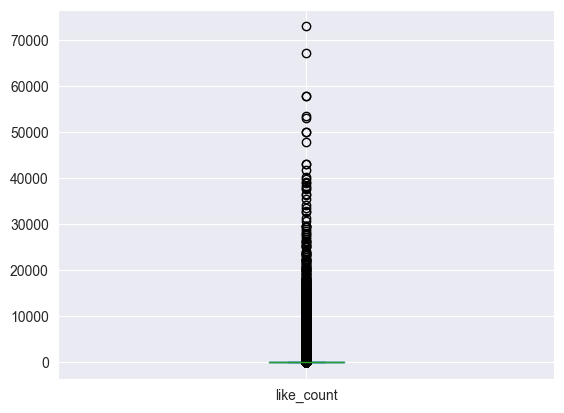

In [9]:
standard_tweets.like_count.plot.box()

<AxesSubplot: >

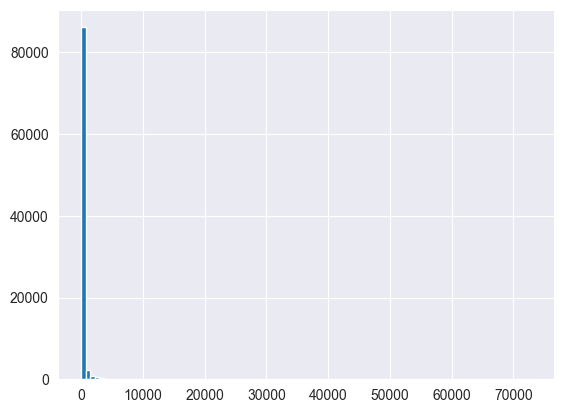

In [14]:
standard_tweets.like_count.hist(bins=100)